# Assignment 01

Name : Nimna Alupotha Gamage (NIMNA A. G. T.) - Index No.: s14682 - Reg. No. : 2019s17241 - Faculty : Science

# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import Tensorflow and Keras

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Import Dataset

In [4]:
dataset = pd.read_csv('/Users/User/CS 3120/Medicalpremium.csv')

In [5]:
dataset

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


# Data Cleaning

In [6]:
#One of the pre-processing techniques is cleaning the dataset to remove unknown values

#Check whether the unknown values are present in the dataset
dataset.isna().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [7]:
#No unknown values in the dataset

#if unknown values are detected those unknown values can be dropped by using below code segments
dataset = dataset.dropna()
dataset

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


Same number of rows and columns can be seen in the above output as the dataset doesn't contain any unknown values.

There is no categorical values in our dataset. If categorical values are present in the dataset, those values should be transformed into original data.

# Define x and y variables

In [8]:
x = dataset.drop(['PremiumPrice'], axis = 1).values
y = dataset['PremiumPrice'].values
print(x)
#print(y)

[[45  0  0 ...  0  0  0]
 [60  1  0 ...  0  0  0]
 [36  1  1 ...  0  0  1]
 ...
 [56  0  1 ...  0  0  1]
 [47  1  1 ...  1  0  1]
 [21  0  0 ...  1  0  1]]


# Split the dataset into a Training Set and a Test Set

In [9]:
#The training dataset is used to feed/train the model.
#The test dataset is used in the final evaluation of the model.

training_dataset = dataset.sample(frac=0.7, random_state=0)
test_dataset = dataset.drop(training_dataset.index)

print(dataset.shape,training_dataset.shape,test_dataset.shape)

(986, 11) (690, 11) (296, 11)


In [10]:
#If sklearn is used;

#from sklearn.model_selection import train_test_split

#x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 0)
#print("x_train shape: ", x_train.shape)
#print("x_test shape: ", x_test.shape)
#print("y_train shape: ", y_train.shape)
#print("y_test shape: ", y_test.shape)

In [11]:
#To get statistical parameters from the dataset
training_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,690.0,41.675362,13.811150,18.0,30.0,42.0,53.0,66.0
Diabetes,690.0,0.408696,0.491949,0.0,0.0,0.0,1.0,1.0
BloodPressureProblems,690.0,0.452174,0.498068,0.0,0.0,0.0,1.0,1.0
AnyTransplants,690.0,0.052174,0.222539,0.0,0.0,0.0,0.0,1.0
AnyChronicDiseases,690.0,0.194203,0.395873,0.0,0.0,0.0,0.0,1.0
Height,690.0,168.494203,10.072342,145.0,162.0,169.0,176.0,188.0
Weight,690.0,76.746377,14.163600,51.0,67.0,75.0,87.0,132.0
KnownAllergies,690.0,0.208696,0.406671,0.0,0.0,0.0,0.0,1.0
HistoryOfCancerInFamily,690.0,0.118841,0.323836,0.0,0.0,0.0,0.0,1.0
NumberOfMajorSurgeries,690.0,0.669565,0.762568,0.0,0.0,1.0,1.0,3.0


# Split features from Labels

In [12]:
training_features = training_dataset.copy()
testing_features = test_dataset.copy()

train_labels = training_features.pop("PremiumPrice")
test_labels = testing_features.pop("PremiumPrice")

train_labels

231    23000
688    23000
27     28000
366    23000
715    38000
       ...  
221    35000
915    28000
146    23000
289    38000
29     21000
Name: PremiumPrice, Length: 690, dtype: int64

# Normalization

The task of normalization is used to convert different scale values to same scale values.

In [13]:
training_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Age,41.675362,13.811150
Diabetes,0.408696,0.491949
BloodPressureProblems,0.452174,0.498068
AnyTransplants,0.052174,0.222539
AnyChronicDiseases,0.194203,0.395873
Height,168.494203,10.072342
Weight,76.746377,14.163600
KnownAllergies,0.208696,0.406671
HistoryOfCancerInFamily,0.118841,0.323836
NumberOfMajorSurgeries,0.669565,0.762568


In [14]:
#Create the normalization layer
normalization_layer = tf.keras.layers.Normalization(axis=-1)

#Feed the data to the Normalization layer
normalization_layer.adapt(np.array(training_features))

print(normalization_layer.mean.numpy())

[[4.1675362e+01 4.0869564e-01 4.5217389e-01 5.2173916e-02 1.9420289e-01
  1.6849423e+02 7.6746361e+01 2.0869565e-01 1.1884058e-01 6.6956526e-01]]


In [15]:
first_row = np.array(training_features[:1])

with np.printoptions(precision=2, suppress=True):
 print('First example:', first_row)
 print()
 print('Normalized:', normalization_layer(first_row).numpy())

First example: [[ 36   1   0   0   0 180  74   0   0   0]]

Normalized: [[-0.41  1.2  -0.91 -0.23 -0.49  1.14 -0.19 -0.51 -0.37 -0.88]]


# Create the Model

In [16]:
linear_model = tf.keras.Sequential([
 normalization_layer,
 layers.Dense(units=1)
])

linear_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 10)                21        
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 32
Trainable params: 11
Non-trainable params: 21
_________________________________________________________________


In [17]:
#If sklearn is used;

#from sklearn.linear_model import LinearRegression

#linreg = LinearRegression()
#linreg.fit(x_train, y_train)
#predicted_value = linreg.predict(x_test)

In [18]:
linear_model.predict(training_features[:10])

array([[ 1.1091598],
       [ 1.6044915],
       [-1.9419107],
       [-0.2963156],
       [ 3.4324474],
       [ 0.233035 ],
       [ 1.5921698],
       [-2.0566518],
       [-0.3561666],
       [-1.4150133]], dtype=float32)

In [19]:
linear_model.layers[1].kernel

<tf.Variable 'dense/kernel:0' shape=(10, 1) dtype=float32, numpy=
array([[-0.5566908 ],
       [ 0.68173426],
       [ 0.48516792],
       [ 0.36472887],
       [ 0.1020661 ],
       [ 0.6730271 ],
       [-0.6511448 ],
       [-0.32497987],
       [ 0.32818288],
       [ 0.3475725 ]], dtype=float32)>

# Compile the Model

In [20]:
linear_model.compile(
 optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
 loss="mean_absolute_error")

There are three types of metrics for Regression as 'Mean Squared Error', 'Root Mean Squared Error', and the 'Mean Absolute Error'.

The 'Mean Absolute Error' is used as the performance metrics in this model and it is calculated as the average of the absolute error values.

# Train the Model

In [48]:
%%time     
history = linear_model.fit(
 training_features,
 train_labels,
 epochs=15000,    
 verbose=0,     
 validation_split = 0.2)

#epochs-Number of iterations
#verbose-Logging variable
#validation_split-20% of the training data is used to calculate validation results
#Above mentioned parameters can be changed. That process is called 'Hyper parameter tuning'

CPU times: total: 12min 28s
Wall time: 10min 41s


In [49]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
14995,2723.897217,2434.625488,14995
14996,2723.864258,2434.593018,14996
14997,2723.873535,2434.512451,14997
14998,2723.893066,2434.463867,14998
14999,2723.912842,2434.423584,14999


# Plot the Results

In [50]:
def plot_loss(history):
 plt.plot(history.history['loss'], label='loss')
 plt.plot(history.history['val_loss'], label='val_loss')
 plt.ylim([0, 25000])
 plt.xlabel('Epoch')
 plt.ylabel('Error [PremiumPrice]')
 plt.legend()
 plt.grid(True)
 plt.title("Error [PremiumPrice] Vs Epoch")

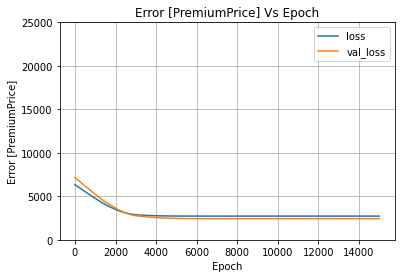

In [51]:
plot_loss(history)

In generally, a model that trained with low number of epochs performs worse than a model trained with high number of epochs as the same data is used for validation.

In a good plot:

-The plot of training loss(loss) decreases to a point of stability.

-The plot of validation loss(val_loss) decreases to a point of stability and has a small gap with the training loss.

# Evaluate the Model

In [52]:
test_results = {}

test_results['linear_model'] = linear_model.evaluate(
 testing_features, test_labels, verbose=0)

print(test_results['linear_model'])
#output shows the error value
#The error value will be decreased by increasing the epochs value

2631.571533203125


In [53]:
pd.DataFrame(test_results, index=['Mean absolute error[PremiumPrice]'])

,linear_model
Mean absolute error[PremiumPrice],2631.571533


In [54]:
#if sklearn is used, r2_score can be used to evaluate the model.

#from sklearn.metrics import r2_score
#r2_score(y_test, pedicted_value)

# Make Predictions

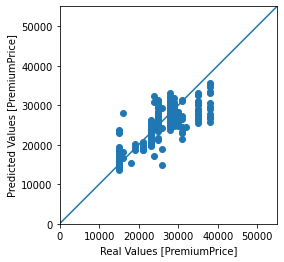

In [55]:
#Scattered Plot

test_predictions = linear_model.predict(testing_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('Real Values [PremiumPrice]')
plt.ylabel('Predicted Values [PremiumPrice]')
lims = [0, 55000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [56]:
data = {'Age':61, 'Diabetes':1, 'BloodPressureProblems':1, 'AnyTransplants':0, 'AnyChronicDiseases':0, 'Height':168, 
        'Weight':80, 'KnownAllergies':1, 'HistoryOfCancerInFamily':0, 'NumberOfMajorSurgeries':2}
index = [0]
person_data = pd.DataFrame(data, index)
person_data

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,61,1,1,0,0,168,80,1,0,2


In [57]:
premiumprice_pred = linear_model.predict(person_data)
print("The person's health insurance premium price is: ", premiumprice_pred)

The person's health insurance premium price is:  [[28803.824]]


The 'Mean Absolute Error' is high in this model.(2631.571533203125)

The error can be reduced by training the model with high number of epochs/ iterations.